In [2]:
import numpy as np
import pandas as pd
import csv
import pickle

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from PIL import Image

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns

In [ ]:
%load_ext autoreload
%autoreload 2
from main.utils.loaders import FaceDataSet
from main.models.classification_layers import final_net
from main.interpretation.grad_cam import GradCam

In [4]:
if torch.cuda.is_available():
    device_ = torch.device('cuda')
else:
    device_ = 'cpu'

# Set up model
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
model_res = resnet50(weights=weights_resnet)

# Set up class layer
num_in = model_res.fc.out_features
last_layers = final_net(num_in=num_in)
model_res = model_res.to(device_)

last_layers = last_layers.to(device_)
model = nn.Sequential(model_res, last_layers)
model = model.to(device_)

model.load_state_dict(torch.load('./data/model_second_beard.torch'))
model = model.to(device_)

In [6]:
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')


#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

In [7]:
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id == '027789.jpg']

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


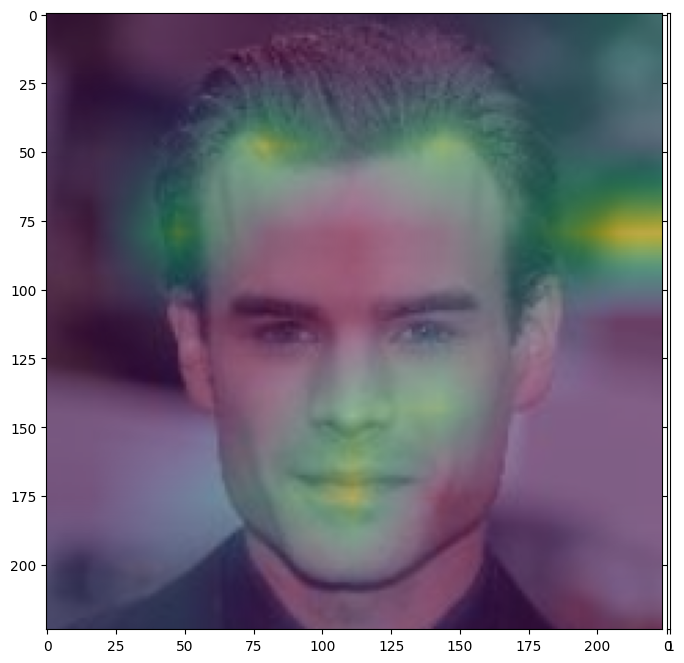

In [8]:
k='181956'
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id == f'{k}.jpg']

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


feat_list = []
out_list = []
tensors_out = []
labs_out = []
pres_out = []

for inputs, labels, _ in validation_dataloader:       
    inputs, labels = Variable(inputs.to(device_)), Variable(labels.to(device_)) 
    grad_cam = GradCam(model, target_layer_names = ["layer4"], use_cuda=False)
    out_ = grad_cam(inputs)
    preds_ = model(inputs)
    preds_ = torch.sigmoid(preds_)

    pres_out.append(preds_.cpu().detach().numpy())
    labs_out.append(labels.cpu().detach().numpy())

    feat_list.append(list(_.detach().numpy()))
    out_list.append(out_)
    tensors_out.append(inputs)

fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)

In [10]:
import pickle
with open('data/results/viz/gradcam_male_example.pkl', 'rb') as con_:
    dict_gradcam_male = pickle.load(con_)

In [12]:
dict_gradcam_male['second_application'] = out_list[0]

In [13]:
import pickle
with open('data/results/viz/gradcam_male_example.pkl', 'wb') as con_:
    pickle.dump(dict_gradcam_male, con_)


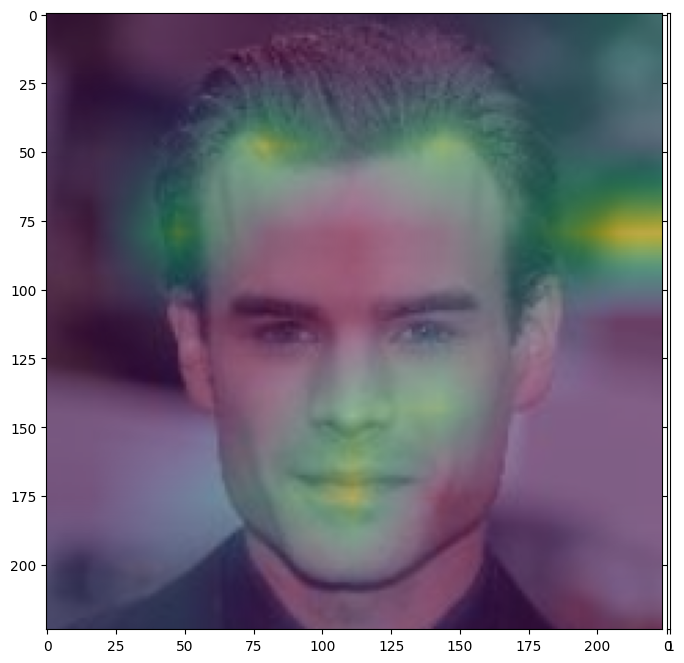

In [131]:
k='181956'
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id == f'{k}.jpg']

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


feat_list = []
out_list = []
tensors_out = []
labs_out = []
pres_out = []

for inputs, labels, _ in validation_dataloader:       
    inputs, labels = Variable(inputs.to(device_)), Variable(labels.to(device_)) 
    grad_cam = GradCam(model, target_layer_names = ["layer4"], use_cuda=False)
    out_ = grad_cam(inputs)
    preds_ = model(inputs)
    preds_ = torch.sigmoid(preds_)

    pres_out.append(preds_.cpu().detach().numpy())
    labs_out.append(labels.cpu().detach().numpy())

    feat_list.append(list(_.detach().numpy()))
    out_list.append(out_)
    tensors_out.append(inputs)

fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)

# inp = mean_2_torch.numpy().transpose((1, 2, 0))
# mean = np.array([0.485, 0.456, 0.406])
# std = np.array([0.229, 0.224, 0.225])
# inp = std * inp + mean

# grid[1].imshow(inp)
# grid[1].imshow(mean_img_2, alpha=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


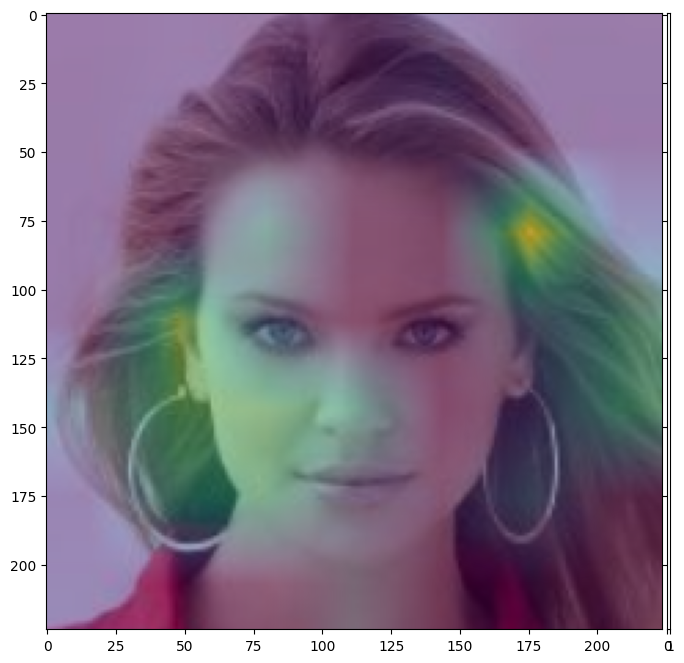

In [83]:
k='072596'
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id == f'{k}.jpg']

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


feat_list = []
out_list = []
tensors_out = []
labs_out = []
pres_out = []

for inputs, labels, _ in validation_dataloader:       
    inputs, labels = Variable(inputs.to(device_)), Variable(labels.to(device_)) 
    grad_cam = GradCam(model, target_layer_names = ["layer4"], use_cuda=False)
    out_ = grad_cam(inputs)
    preds_ = model(inputs)
    preds_ = torch.sigmoid(preds_)

    pres_out.append(preds_.cpu().detach().numpy())
    labs_out.append(labels.cpu().detach().numpy())

    feat_list.append(list(_.detach().numpy()))
    out_list.append(out_)
    tensors_out.append(inputs)

fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)



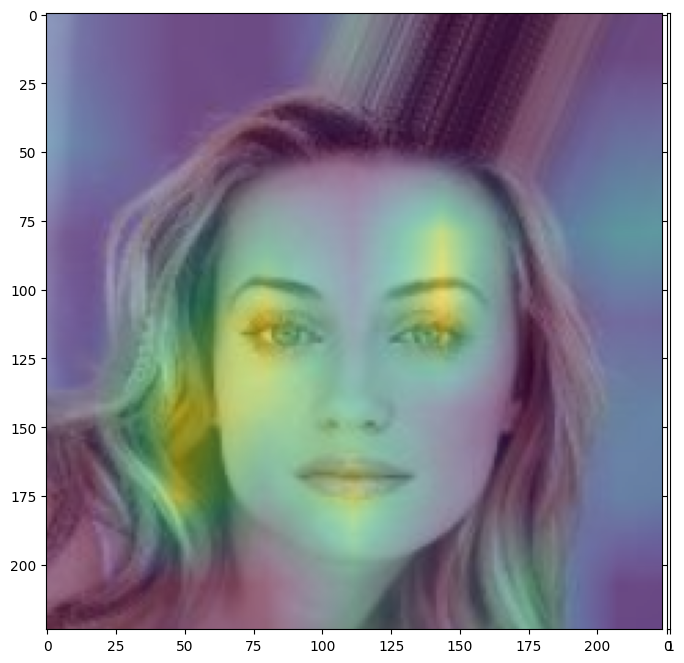

In [74]:
k='024358'
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id == f'{k}.jpg']

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


feat_list = []
out_list = []
tensors_out = []
labs_out = []
pres_out = []

for inputs, labels, _ in validation_dataloader:       
    inputs, labels = Variable(inputs.to(device_)), Variable(labels.to(device_)) 
    grad_cam = GradCam(model, target_layer_names = ["layer4"], use_cuda=False)
    out_ = grad_cam(inputs)
    preds_ = model(inputs)
    preds_ = torch.sigmoid(preds_)

    pres_out.append(preds_.cpu().detach().numpy())
    labs_out.append(labels.cpu().detach().numpy())

    feat_list.append(list(_.detach().numpy()))
    out_list.append(out_)
    tensors_out.append(inputs)

fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


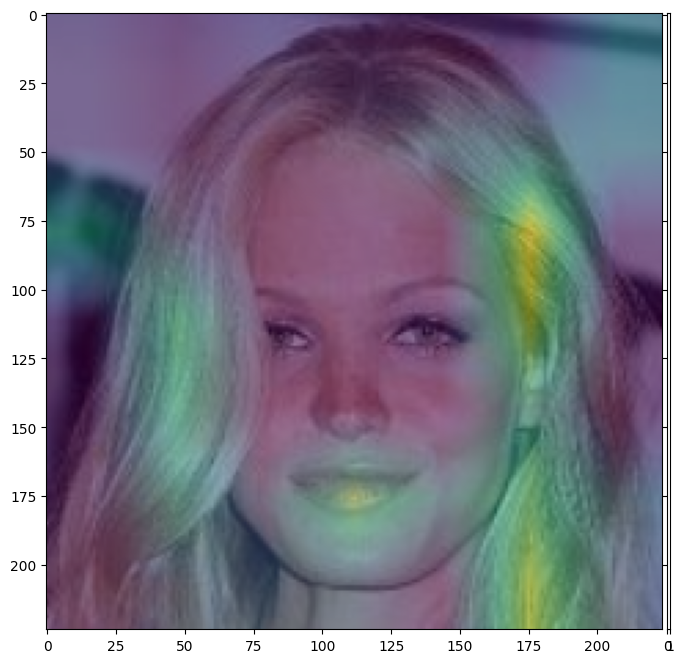

In [114]:
k='066608'
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id == f'{k}.jpg']

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


feat_list = []
out_list = []
tensors_out = []
labs_out = []
pres_out = []

for inputs, labels, _ in validation_dataloader:       
    inputs, labels = Variable(inputs.to(device_)), Variable(labels.to(device_)) 
    grad_cam = GradCam(model, target_layer_names = ["layer4"], use_cuda=False)
    out_ = grad_cam(inputs)
    preds_ = model(inputs)
    preds_ = torch.sigmoid(preds_)

    pres_out.append(preds_.cpu().detach().numpy())
    labs_out.append(labels.cpu().detach().numpy())

    feat_list.append(list(_.detach().numpy()))
    out_list.append(out_)
    tensors_out.append(inputs)

fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


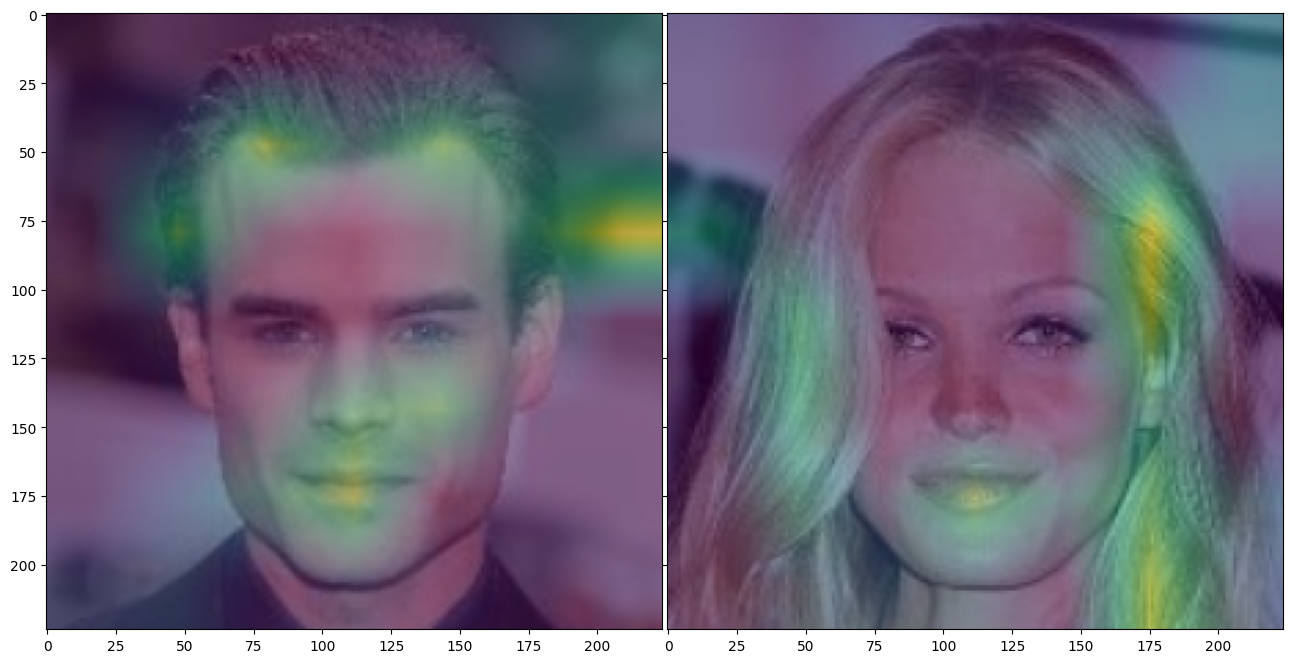

In [134]:
both_=['066608.jpg', '181956.jpg']
data_labs = pd.read_csv('./data/prepared/faces/direct_faces.csv')
data_labs = data_labs.loc[data_labs.img_id.isin(both_)]

#  Load model and prepare
weights_resnet = ResNet50_Weights.IMAGENET1K_V2
preprocessor_ = weights_resnet.transforms()

valid_dataset = FaceDataSet(data_labs, sens_idx=21,transform=preprocessor_)
validation_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)


feat_list = []
out_list = []
tensors_out = []
labs_out = []
pres_out = []

for inputs, labels, _ in validation_dataloader:       
    inputs, labels = Variable(inputs.to(device_)), Variable(labels.to(device_)) 
    grad_cam = GradCam(model, target_layer_names = ["layer4"], use_cuda=False)
    out_ = grad_cam(inputs)
    preds_ = model(inputs)
    preds_ = torch.sigmoid(preds_)

    pres_out.append(preds_.cpu().detach().numpy())
    labs_out.append(labels.cpu().detach().numpy())

    feat_list.append(list(_.detach().numpy()))
    out_list.append(out_)
    tensors_out.append(inputs)

fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)

inp = tensors_out[1].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[1].imshow(inp)
grid[1].imshow(out_list[1], alpha=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


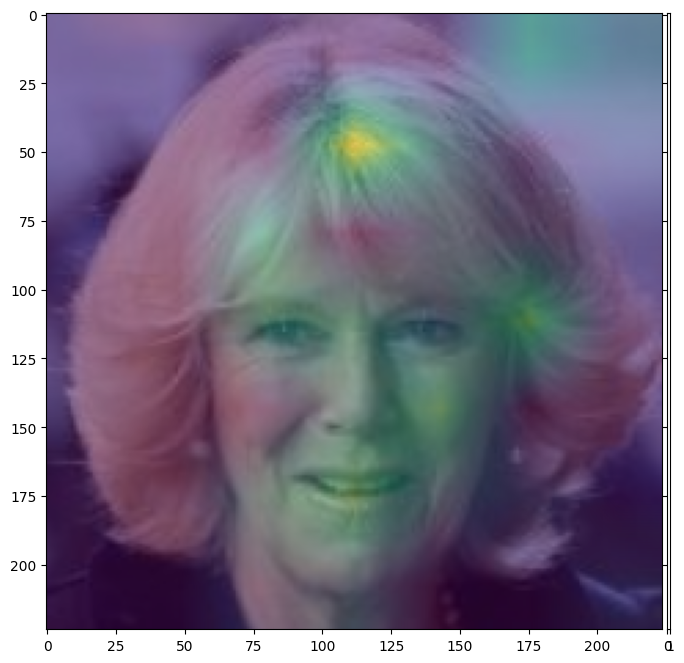

In [96]:
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.05)

inp = tensors_out[0].squeeze().numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean

grid[0].imshow(inp)
grid[0].imshow(out_list[0], alpha=0.5)


In [60]:
all_gradcams = {'scores': pres_out,
                'labels': labs_out,

                'sens': feat_list, 
                'out_tabs': out_list, 
                'img_tensors': tensors_out}

In [61]:
# with open('data/prepared/gradcams_second_beard.pkl', 'wb') as con_:
#     pickle.dump(all_gradcams, con_)

In [45]:
# with open('data/prepared/gradcams_second_young.pkl', 'wb') as con_:
#     pickle.dump(all_gradcams, con_)